# Introduction to Regression with Neural Networks in Tensorflow
Predicting numerical variable based on ssome other input numbers.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Let's create a data to view an fit

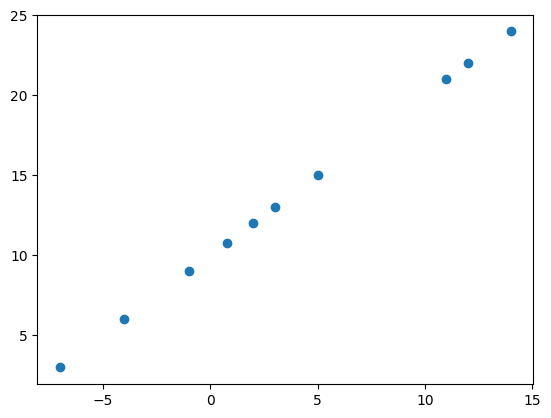

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 3.0, 5.0, 0.8, 11.0, 12.0, 14.0])

y = np.array(X+10)

plt.scatter(X, y);


## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant(939700)

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [ ]:
X[0].ndim

0

In [ ]:
y[0].ndim

0

In [ ]:
# Turn the data X,y into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([-7. , -4. , -1. ,  2. ,  3. ,  5. ,  0.8, 11. , 12. , 14. ])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 3. ,  6. ,  9. , 12. , 13. , 15. , 10.8, 21. , 22. , 24. ])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling the TensorFlow model

1. **Creating the model**: input and output building
2. **Compiling the model**: loss, optimizer and evaluation metric
3. **Fitting the model**
4. **Evaluate the model** using the R2 score or RMSE score

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = [tf.keras.metrics.MeanAbsoluteError()]) # metrics =['mae'] would work as well

# Fit the model
model.fit(tf.expand_dims(X, axis =-1), tf.expand_dims(y, axis =-1), epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 840ms/step - loss: 8.1133 - mean_absolute_error: 8.1133
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 7.9751 - mean_absolute_error: 7.9751
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 7.8370 - mean_absolute_error: 7.8370
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 7.6988 - mean_absolute_error: 7.6988
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 7.5606 - mean_absolute_error: 7.5606


In [ ]:
# Try and make a prediction on the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 142ms/step


array([[29.052258]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model:
1. **Creating a model** - here we might ass more layers, increase hidden unit, change activation function of each layer

2. **Compiling the model** - Might try to change the optimizer or by setting a learning rate,

3. **Fitting the model** - Might want to increase the no of epochs



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the improved model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis= -1), tf.expand_dims(y, axis = -1), epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 572ms/step - loss: 15.7085 - mae: 15.7085
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 15.4541 - mae: 15.4541
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 15.1997 - mae: 15.1997
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.9826 - mae: 14.9826
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.8444 - mae: 14.8444
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 14.7063 - mae: 14.7063
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5681 - mae: 14.5681
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4300 - mae: 14.4300
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.2918 - mae: 14.2918
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 14.1536 - mae: 14.1536
Epoch 11/100
1/1 [==============================

In [ ]:
y_pred = model.predict(X)
y_pred

1/1 [==============================] - 0s 90ms/step


array([[-11.464728 ],
       [ -6.1664157],
       [ -0.8681039],
       [  4.430208 ],
       [  6.1963124],
       [  9.728519 ],
       [  2.3108833],
       [ 20.325144 ],
       [ 22.09125  ],
       [ 25.623457 ]], dtype=float32)

In [ ]:
tf.reshape(y_pred, [10,])

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-11.464728 ,  -6.1664157,  -0.8681039,   4.430208 ,   6.1963124,
         9.728519 ,   2.3108833,  20.325144 ,  22.09125  ,  25.623457 ],
      dtype=float32)>

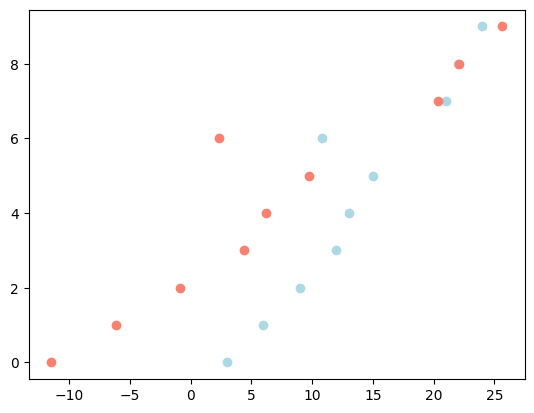

In [ ]:
num = list(range(len(y_pred)))

plt.scatter(tf.reshape(y, [10,]), num,  color = 'lightblue')
plt.scatter(tf.reshape(y_pred, [10,]), num,  color = 'salmon')

plt.show()

In [ ]:
# Let's improve our model a bit more

# Set random seed
tf.random.set_seed(42)

# Create the improved model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis= -1), tf.expand_dims(y, axis = -1), epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.8905 - mae: 13.8905
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.4089 - mae: 13.4089
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.9605 - mae: 12.9605
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5173 - mae: 12.5173
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0614 - mae: 12.0614
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6176 - mae: 11.6176
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1427 - mae: 11.1427
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5884 - mae: 10.5884
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8832 - mae: 9.8832
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.9779 - mae: 8.9779
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([-7. , -4. , -1. ,  2. ,  3. ,  5. ,  0.8, 11. , 12. , 14. ])>

In [ ]:
y

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 3. ,  6. ,  9. , 12. , 13. , 15. , 10.8, 21. , 22. , 24. ])>

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 148ms/step


array([[ 3.1317897],
       [ 2.4584246],
       [ 1.9035488],
       [ 5.842693 ],
       [ 7.440041 ],
       [10.634735 ],
       [ 3.9171362],
       [20.218822 ],
       [21.81617  ],
       [25.010866 ]], dtype=float32)

1/1 [==============================] - 0s 40ms/step


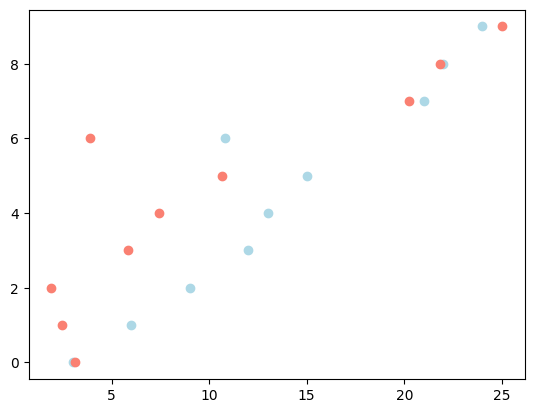

In [ ]:
num = list(range(len(y_pred)))

plt.scatter(tf.reshape(y, [10,]), num,  color = 'lightblue')
plt.scatter(tf.reshape(model.predict(X), [10,]), num,  color = 'salmon')

plt.show()

In [ ]:
# Let's improve our model a bit more

# Set random seed
tf.random.set_seed(42)

# Create the improved model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ['mae'])

# Fit the model
result = model.fit(tf.expand_dims(X, axis= -1), tf.expand_dims(y, axis = -1), epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.9313 - mae: 13.9313
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 45.6631 - mae: 45.6631
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 13.3326 - mae: 13.3326
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 13.8591 - mae: 13.8591
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 12.6162 - mae: 12.6162
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 11.0038 - mae: 11.0038
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 5.3738 - mae: 5.3738
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 6.1328 - mae: 6.1328
Epoch 9/100
1/1 [==============================] - 0s 46ms/step - loss: 10.2450 - mae: 10.2450
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.8083 - mae: 7.8083
Epoch 11/100
1/1 [==============================] - 0s 17

1/1 [==============================] - 0s 139ms/step


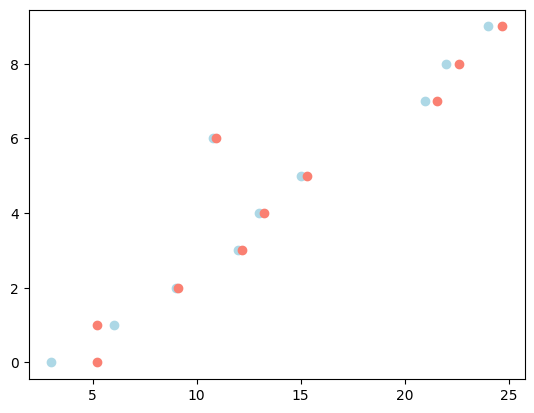

In [ ]:
num = list(range(len(y_pred)))

plt.scatter(tf.reshape(y, [10,]), num,  color = 'lightblue')
plt.scatter(tf.reshape(model.predict(X), [10,]), num,  color = 'salmon')

plt.show()

## Evaluate the model

In [ ]:
model.evaluate(X,y)

1/1 [==============================] - 0s 322ms/step - loss: 0.5794 - mae: 0.5794


[0.5794317126274109, 0.5794317126274109]

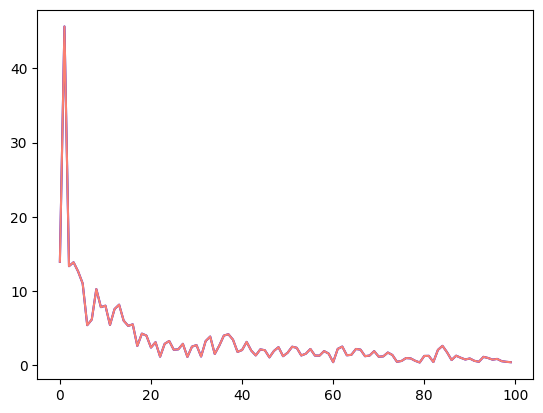

In [ ]:
plt.plot(result.history['loss'], color = 'blue')
plt.plot(result.history['mae'], color = 'salmon')
plt.show()

## Lets make a bigger dataset

In [ ]:
## Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

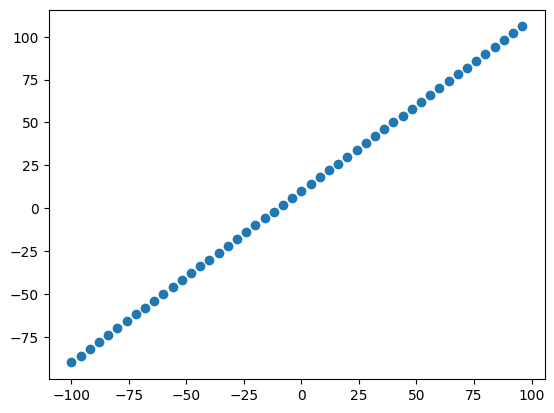

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

### Visualizing the data

Now we've got out train and test data ..... let's visualize it

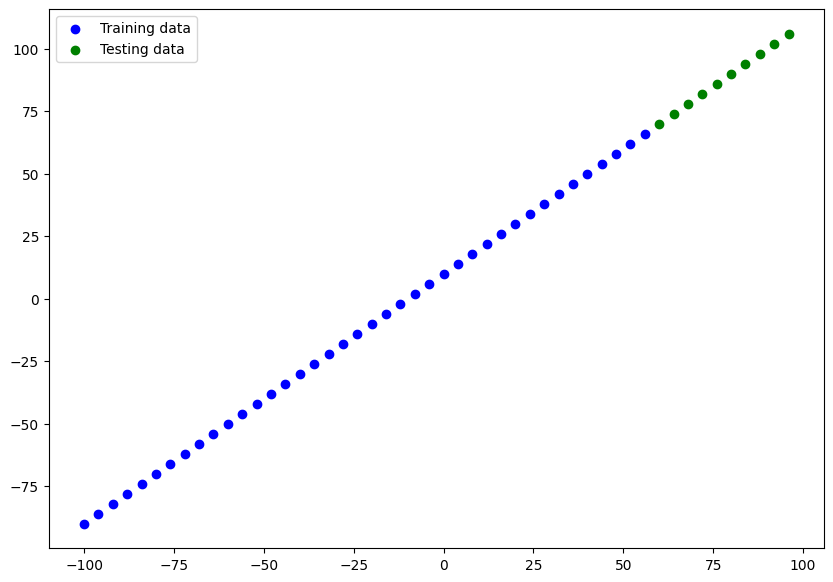

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')
plt.legend()
plt.show()

Let's have a look at how to build a neural network for this kind of data


In [ ]:
# 1. Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the data
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = [tf.keras.metrics.MeanAbsoluteError()])

# Fit the model
#model.fit(X_train, y_train, epochs = 100)

In [ ]:
# Let's create a model which builds automatically by defining the input shape of the tensor

# 1. Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

# Compile the data
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.1),
              metrics = [tf.keras.metrics.MeanAbsoluteError()])

# Fit the model
#model.fit(X_train, y_train, epochs = 100)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 100)               1100      
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 21,421
Trainable params: 21,421
Non-trainable params: 0
_________________________________________________________________


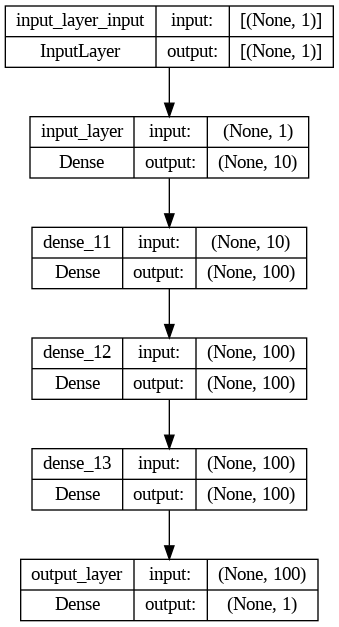

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True)

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 9ms/step - loss: 39.2174 - mean_absolute_error: 39.2174
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 34.4212 - mean_absolute_error: 34.4212
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 30.1876 - mean_absolute_error: 30.1876
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 25.7454 - mean_absolute_error: 25.7454
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 21.0640 - mean_absolute_error: 21.0640
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 16.0047 - mean_absolute_error: 16.0047
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1715 - mean_absolute_error: 11.1715
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 10.9810 - mean_absolute_error: 10.9810
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 9.7405 - mean_absolute_error: 9.7405
Epoch 10/1

## Visualizing the model predictions

To visualize predictions, it's a good idea to plot them against the ground truth values.

`y_test / y_true`

And,

`y_pred`

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 392ms/step


array([[ 73.33743 ],
       [ 78.05074 ],
       [ 82.76407 ],
       [ 87.47737 ],
       [ 92.19068 ],
       [ 96.904015],
       [101.61733 ],
       [106.330635],
       [111.04397 ],
       [115.757286]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

## Creating the plotting function

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares the predictions to the ground truth
  """
  #1. Plot the training data
  plt.scatter(train_data ,train_labels , c = 'b', label = 'Training data')
  #2. Plot the testing data
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
  #3. Plot models prediction in red
  plt.scatter(test_data, predictions, c= 'r', label = 'Predictions')
  #Show the legends
  plt.legend()

NameError: ignored

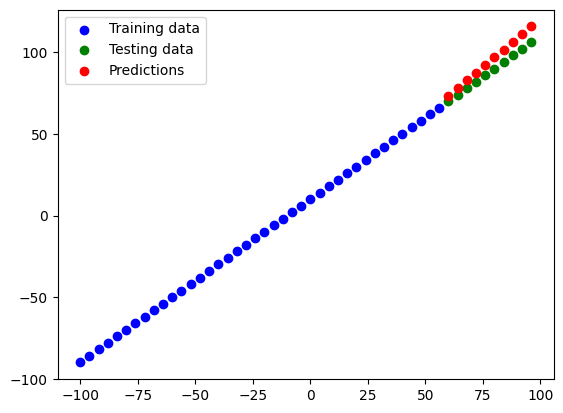

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

In [ ]:
# Evaluate the model onthe test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 540ms/step - loss: 6.5474 - mean_absolute_error: 6.5474


[6.547354698181152, 6.547354698181152]

In [ ]:
y_pred.dtype

dtype('float32')

In [ ]:
y_pred = tf.constant(y_pred)

In [ ]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 73.33743 ],
        [ 78.05074 ],
        [ 82.76407 ],
        [ 87.47737 ],
        [ 92.19068 ],
        [ 96.904015],
        [101.61733 ],
        [106.330635],
        [111.04397 ],
        [115.757286]], dtype=float32)>)

In [ ]:
# Calculate the mean squared error
MSE = tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
MSE

<tf.Tensor: shape=(), dtype=float32, numpy=47.06561>

In [ ]:
MAE = tf.keras.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
MAE

<tf.Tensor: shape=(), dtype=float32, numpy=6.5473533>

In [ ]:
tf.keras.losses.huber(y_true = y_test, y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=6.0473533>

In [ ]:
def mae(y_true, y_pred):
  return tf.keras.losses.mean_absolute_error(y_true = y_true,
                                             y_pred = tf.squeeze(y_pred))

def mse(y_true, y_test):
  return tf.keras.losses.mean_squared_error(y_true = y_true,
                                            y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model

Top three to tweak the peformance of your model
1. Get more data
2. Make model larger by adding more layers and units to the model
3. Train for longer by increasing the number of epochs

Let's do 3 modelling steps:
1. `model_1`  same as original,1 layer, trained for 100 epochs
2. `model_2` - same as original, 2 layers, trained for 100 epochs
3. `model_3` - same as original, 2 layers, trained for 500 epochs

### Creating the model_1

In [ ]:
# Creating the model_1
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model_1.compile(loss = ['mae'],
           optimizer = tf.keras.optimizers.SGD(),
           metrics = ['mae'])

model_1.fit(X_train, y_train , epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 95.9184 - mae: 95.9184
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 60.4629 - mae: 60.4629
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 23.4599 - mae: 23.4599
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4928 - mae: 12.4928
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.5431 - mae: 11.5431
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.6445 - mae: 10.6445
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5986 - mae: 9.5986
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0438 - mae: 9.0438
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 17.8837 - mae: 17.8837
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6516 - mae: 9.6516
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 96ms/step


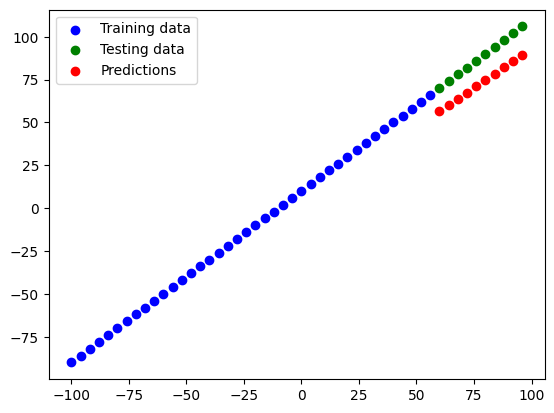

In [ ]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1)

In [ ]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test,y_pred_1)
print(np.array(mae_1))
print(np.array(mse_1))

15.020655
47.06561


### Creating model_2

In [ ]:
# Create model_2
tf.random.set_seed(42)

# Setting up the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1], activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = [tf.keras.metrics.MeanAbsoluteError()])

# Fitting the model
model_2.fit(X_train, y_train, epochs = 100, verbose = True)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 39.3029 - mean_absolute_error: 39.3029
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 21.3737 - mean_absolute_error: 21.3737
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 16.5472 - mean_absolute_error: 16.5472
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9721 - mean_absolute_error: 7.9721
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.9214 - mean_absolute_error: 10.9214
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7835 - mean_absolute_error: 8.7835
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 14.2377 - mean_absolute_error: 14.2377
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 7.0225 - mean_absolute_error: 7.0225
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 22.8655 - mean_absolute_error: 22.8655
Epoch 10

In [ ]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 84ms/step


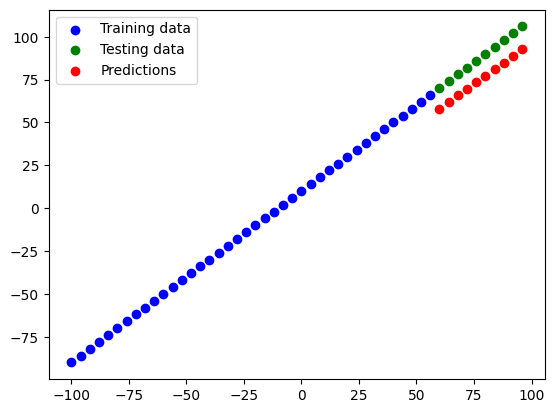

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test,y_pred_2)
print(np.array(mae_2))
print(np.array(mse_2))

12.629549
47.06561


### Creating the model_3

In [ ]:
# create model_3
tf.random.set_seed(42)

# Setting up model_3
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1]),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ['mae'])

# Fitting the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 2s 13ms/step - loss: 39.6333 - mae: 39.6333
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 36.0153 - mae: 36.0153
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 32.7330 - mae: 32.7330
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 28.5006 - mae: 28.5006
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 23.0614 - mae: 23.0614
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 16.2145 - mae: 16.2145
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 10.5568 - mae: 10.5568
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.9475 - mae: 11.9475
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 6.0975 - mae: 6.0975
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 6.6612 - mae: 6.6612
Epoch 11/500
2/2 [==============================] - 0s 8ms/ste

In [ ]:
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 142ms/step


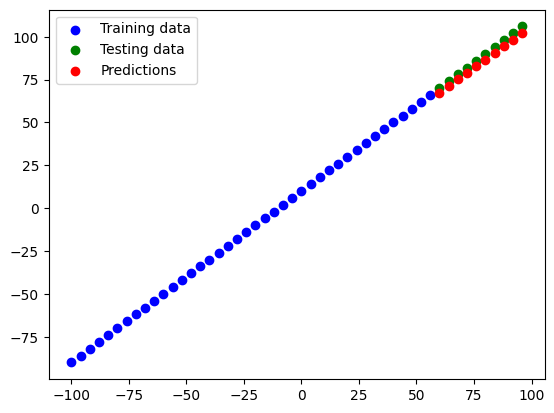

In [ ]:
plot_predictions(X_train,y_train, X_test,y_test,y_pred_3)

In [ ]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=3.230191>,
 <tf.Tensor: shape=(), dtype=float32, numpy=47.06561>)

## Comparing the experiments

start small and then increase the scale slowly.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,15.020655,47.065609
1,model_2,12.629549,47.065609
2,model_3,3.230191,47.065609


In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

## Saving model

There are3 two ways to save a model:
1. The SavedModel format
2. The HDF5 format (.h5 extension): Hierarchical Data Format


In [ ]:
# save a model using the SavedModel format

model_3.save('best_model_SavedModel')

In [ ]:
# Savign the model using the HDF5 format
model_3.save('best_model_HDF5_format.h5')

## Loading the saved model

In [ ]:
# load the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel')
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

In [ ]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 153ms/step


In [ ]:
model_3_preds == loaded_SavedModel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-trai

In [ ]:
model_3.summary()

In [ ]:
y_preds_3 = model_3.predict(X_test)
loaded_model_h5_preds = loaded_h5_model.predict(X_test)
y_preds_3 == loaded_model_h5_preds

NameError: ignored

## Downloading the file from google colab

1. Download the files manually from the left pane
2. Download it via code
3. Save the file to google drive

In [ ]:
# from google.colab import files
# files.download('/content/best_model_HDF5_format.h5')

In [ ]:
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TENSORFLOW_2.0/TF_DEV_2.0_UDEMY_ZTM

cp: cannot stat '/content/best_model_HDF5_format.h5': No such file or directory


# A Larger Example

Predicting the medical costs using Linear Regression with Neural Networks

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv') # Turn data available on github to RAW
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let's try one hot encoding for the categorical columns
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y (features and labels)

X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot.charges

In [ ]:
N,d = X.shape
N, d

(1338, 11)

In [ ]:
# Creating Train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(1070, 11)

In [ ]:
# Build a Linear regression Neural Network
# 1. Set Seed
tf.random.set_seed(42)

# 2. Setting up the model
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 3. Compile the model
insurance_model.compile(loss = 'mae',
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ['mae'])

# 4. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8535.4023 - mae: 8535.4023
Epoch 2/100
34/34 [==============================] - 0s 931us/step - loss: 7887.2065 - mae: 7887.2065
Epoch 3/100
34/34 [==============================] - 0s 931us/step - loss: 7531.9653 - mae: 7531.9653
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7692.1250 - mae: 7692.1250
Epoch 5/100
34/34 [==============================] - 0s 900us/step - loss: 7748.5259 - mae: 7748.5259
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7619.2397 - mae: 7619.2397
Epoch 7/100
34/34 [==============================] - 0s 970us/step - loss: 7651.2686 - mae: 7651.2686
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.2300 - mae: 7752.2300
Epoch 9/100
34/34 [==============================] - 0s 922us/step - loss: 7512.7563 - mae: 7512.7563
Epoch 10/100
34/34 [==============================] - 0s 991us/step - loss: 7761.5889 - ma

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8255.8877 - mae: 8255.8877


[8255.8876953125, 8255.8876953125]

### Experiments to improve the model

1. Add extra layer with more hidden units
2. Train for longer
3. Adhoc own experiments

Right now it looks like our model didn't quite performed well.. Let's improve our model

In [ ]:
# Improved model_1
# 1. Set Seed
tf.random.set_seed(42)

# 2. Setting up the model
insurance_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
insurance_model_1.compile(loss = 'mae',
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

# 4. Fit the model
insurance_model_1.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13305.0215 - mae: 13305.0215
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13163.7070 - mae: 13163.7070
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12857.9424 - mae: 12857.9424
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12240.4883 - mae: 12240.4883
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11170.0850 - mae: 11170.0850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9727.0723 - mae: 9727.0723
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8328.8398 - mae: 8328.8398
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7575.3867 - mae: 7575.3867
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7428.8296 - mae: 7428.8296
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7406.5591 - mae:

In [ ]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4882.9985 - mae: 4882.9985


[4882.99853515625, 4882.99853515625]

In [ ]:
# Improved model_2
# 1. Set Seed
tf.random.set_seed(42)

# 2. Setting up the model
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
insurance_model_2.compile(loss = 'mae',
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

# 4. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13292.0430 - mae: 13292.0430
Epoch 2/200
34/34 [==============================] - 0s 971us/step - loss: 13120.7969 - mae: 13120.7969
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12760.5078 - mae: 12760.5078
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12054.2197 - mae: 12054.2197
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10885.0762 - mae: 10885.0762
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9415.1924 - mae: 9415.1924
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8104.4253 - mae: 8104.4253
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7511.5400 - mae: 7511.5400
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7422.1499 - mae: 7422.1499
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7402.4380 - ma

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.3254 - mae: 3488.3254


[3488.325439453125, 3488.325439453125]

Text(0, 0.5, 'loss')

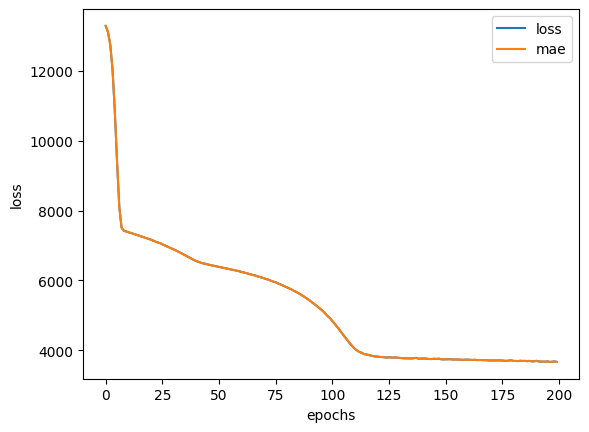

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

## Preprocessing and Normalization

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv') # Turn data available on github to RAW
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


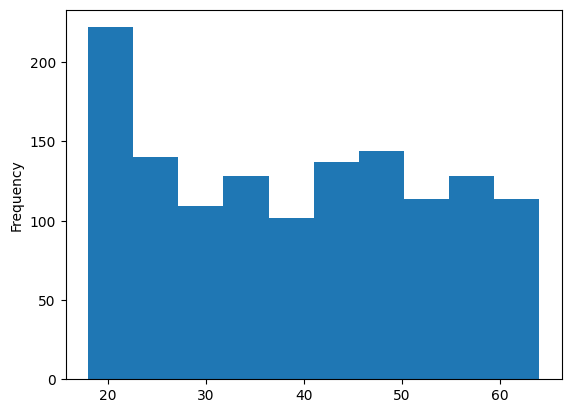

In [ ]:
insurance['age'].plot(kind='hist');

<Axes: ylabel='Frequency'>

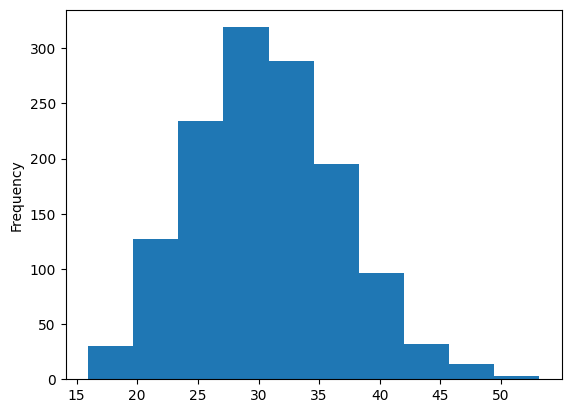

In [ ]:
insurance['bmi'].plot(kind = 'hist')

In [ ]:
insurance['children'].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split as split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # Function along with the columns
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region']) # Function along with the columns. Handle_unkown means
)

# Create X & y
X = insurance.drop('charges', axis = 1)
y = insurance.charges

# Build our train and test sets
X_train, X_test, y_train, y_test = split(X, y , test_size = 0.2, random_state = 42)

# Transform the training and testing data with normalization
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and set to be used on neural networks.

## Building the model for real scenario

In [ ]:
# set up random_seed
tf.random.set_seed(42)

# Create model
model_insurance = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_insurance.compile(loss = 'mae',
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics= ['mae'])

# Fit the model
hist = model_insurance.fit(X_train_normal, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13340.3164 - mae: 13340.3164
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11376.5869 - mae: 11376.5869
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6369.8530 - mae: 6369.8530
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 5547.0249 - mae: 5547.0249
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 5259.0776 - mae: 5259.0776
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 5288.1011 - mae: 5288.1011
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 5051.4854 - mae: 5051.4854
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 5119.1777 - mae: 5119.1777
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 5057.4238 - mae: 5057.4238
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 4922.4189 - mae: 4922.

In [ ]:
model_insurance.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3378.9060 - mae: 3378.9060


[3378.906005859375, 3378.906005859375]